In [14]:
import numpy as np

datasets = ['train', 
            'instrument_ADIR1995', 'instrument_ADIR2003', 
'instrument_ADOS_Module1', 'instrument_ADOS_Module2', 'instrument_ADOS_Module3', 'instrument_ADOS_Module4', 'instrument_ADOS2_Module_Toddler',
'instrument_SRS_Adult', 'instrument_SRS_Child', 
            'entry']

# load data
k, fold = 10, 0
filename = '../gender_models/impute_mult_Y_cv_k%d_fold%d' % (k, fold)
print('Loading', filename)
try:
    Y = np.load(filename + '.npy')
except FileNotFoundError:
    try:
        Y = np.loadtxt(filename + '.csv', delimiter=',', dtype=float)
        np.save(filename, A)
    except FileNotFoundError:
        print('Not found')
        
# load data
k, fold = 10, 0
filename = '../gender_models/impute_mult_gender_Y_cv_k%d_fold%d' % (k, fold)
print('Loading', filename)
try:
    Ygen = np.load(filename + '.npy')
except FileNotFoundError:
    try:
        Ygen = np.loadtxt(filename + '.csv', delimiter=',', dtype=float)
        np.save(filename, B)
    except FileNotFoundError:
        print('Not found')
        
# load data
k, fold = 10, 0
filename = '../gender_models/impute_mult_X_cv_k%d_fold%d' % (k, fold)
print('Loading', filename)
try:
    X = np.load(filename + '.npy')
except FileNotFoundError:
    try:
        X = np.loadtxt(filename + '.csv', delimiter=',', dtype=float)
        np.save(filename, A)
    except FileNotFoundError:
        print('Not found')
        
# load data
k, fold = 10, 0
filename = '../gender_models/impute_mult_gender_X_cv_k%d_fold%d' % (k, fold)
print('Loading', filename)
try:
    Xgen = np.load(filename + '.npy')
except FileNotFoundError:
    try:
        Xgen = np.loadtxt(filename + '.csv', delimiter=',', dtype=float)
        np.save(filename, B)
    except FileNotFoundError:
        print('Not found')

Loading ../gender_models/impute_mult_Y_cv_k10_fold0
Loading ../gender_models/impute_mult_gender_Y_cv_k10_fold0
Loading ../gender_models/impute_mult_X_cv_k10_fold0
Loading ../gender_models/impute_mult_gender_X_cv_k10_fold0


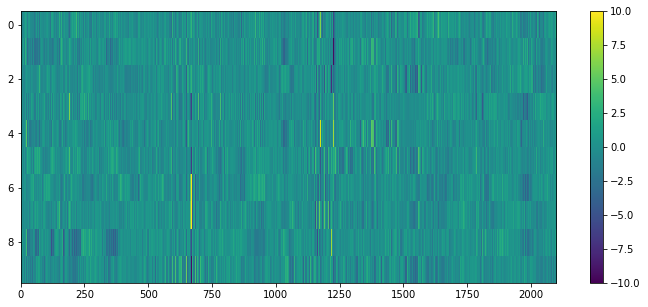

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.imshow(Y, aspect='auto', vmax=10, vmin=-10)
plt.colorbar()
plt.show()

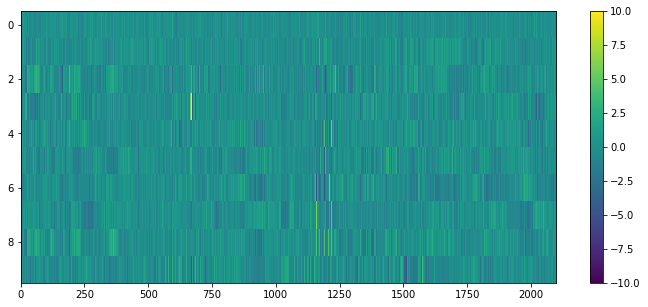

In [20]:
plt.figure(figsize=(12, 5))
plt.imshow(Ygen, aspect='auto', vmax=10, vmin=-10)
plt.colorbar()
plt.show()

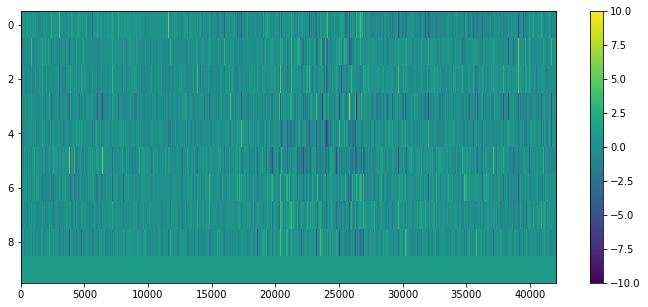

In [21]:
plt.figure(figsize=(12, 5))
plt.imshow(X, aspect='auto', vmax=10, vmin=-10)
plt.colorbar()
plt.show()

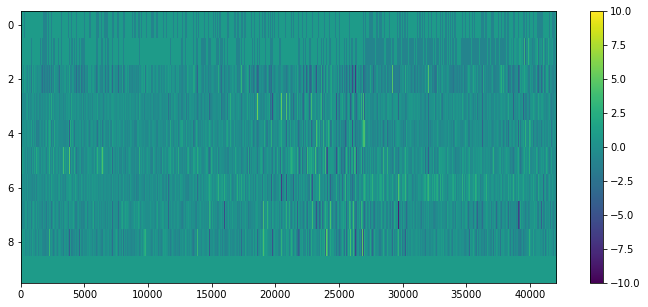

In [22]:
plt.figure(figsize=(12, 5))
plt.imshow(Xgen, aspect='auto', vmax=10, vmin=-10)
plt.colorbar()
plt.show()

In [39]:
from collections import defaultdict

instrument_to_indices = defaultdict(list)
with open('../data/all_samples_ordinal_cleaned_map.txt', 'r') as f:
    index = 0
    for i, line in enumerate(f):
        pieces = line.strip().split('\t')
        inst = pieces[0].split(':')[0]
        num_options = int(pieces[1])
        if num_options == 2:
            num_options = 1
        instrument_to_indices[inst].extend(range(index, index+num_options))
        index += num_options
print(index)

2100


In [75]:
import scipy.stats as st

instrument_to_conf = defaultdict(list)
ks = [5, 7, 10, 12, 15, 17, 20]
for k in ks:
    instrument_to_values = defaultdict(list)
    for fold in range(5):
        filename = '../gender_models/impute_mult_Y_cv_k%d_fold%d' % (k, fold)
        print('Loading', filename)
        Y = np.loadtxt(filename + '.csv', delimiter=',', dtype=float)

        for inst, indices in instrument_to_indices.items():
            instrument_to_values[inst].extend(Y[:-1, indices].flatten())

    for inst, a in instrument_to_values.items():
        instrument_to_conf[inst].append(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))

Loading ../gender_models/impute_mult_gender_Y_cv_k5_fold0
Loading ../gender_models/impute_mult_gender_Y_cv_k5_fold1
Loading ../gender_models/impute_mult_gender_Y_cv_k5_fold2
Loading ../gender_models/impute_mult_gender_Y_cv_k5_fold3
Loading ../gender_models/impute_mult_gender_Y_cv_k5_fold4
Loading ../gender_models/impute_mult_gender_Y_cv_k7_fold0
Loading ../gender_models/impute_mult_gender_Y_cv_k7_fold1
Loading ../gender_models/impute_mult_gender_Y_cv_k7_fold2
Loading ../gender_models/impute_mult_gender_Y_cv_k7_fold3
Loading ../gender_models/impute_mult_gender_Y_cv_k7_fold4
Loading ../gender_models/impute_mult_gender_Y_cv_k10_fold0
Loading ../gender_models/impute_mult_gender_Y_cv_k10_fold1
Loading ../gender_models/impute_mult_gender_Y_cv_k10_fold2
Loading ../gender_models/impute_mult_gender_Y_cv_k10_fold3
Loading ../gender_models/impute_mult_gender_Y_cv_k10_fold4
Loading ../gender_models/impute_mult_gender_Y_cv_k12_fold0
Loading ../gender_models/impute_mult_gender_Y_cv_k12_fold1
Loading

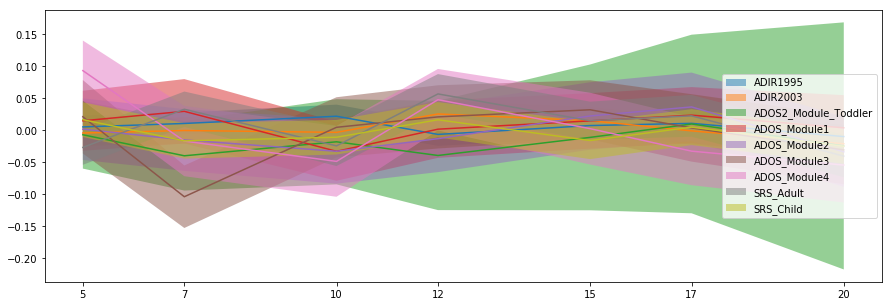

In [77]:
plt.figure(figsize=(15, 5))
for inst, conf in instrument_to_conf.items():
    plt.plot(ks, [np.mean(x) for x in conf])
    plt.fill_between(ks, [x[0] for x in conf], y2=[x[1] for x in conf], label=inst, alpha=0.5)

plt.xticks(ks)
plt.legend(loc='right')

plt.show()